<a href="https://colab.research.google.com/github/FlemmeFacile/data_base_foundations/blob/main/ml/ml_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`machine learning course 2025 (с) mssvctr`

### Домашнее задание 1

**Titanic challenge** - самое известное соревнование по Data Science

Используйте данные о пассажирах Титаника, чтобы построить свой классификатор, который предсказывает вероятность гибели пассажира на печально известном корабле

#### Шаг 1: импорт библиотек

Заполните плейсхолдеры

In [25]:
# импортируйте pandas, numpy, seaborn и matplotlib
# не забывайте о том, что каждая из этих библиотек
# использует свои сокращения

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# далее мы импортируем миллион методов из scikit-learn
# эта часть уже выполнена, ура!

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Шаг 2: загружаем данные с Титаника

In [26]:
# выгрузим датасет напрямую с URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# выведите первые 5 строк датасета
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Шаг 3: анализ данных

Опишите данные и укажите в комментариях к коду ответы на вопросы:

1. выведите df.info()
  - в каких столбцах есть NaN'ы?
  - ориентируясь на количество NaN'ов в столбцах, определите, какие строки "не жалко" выбросить, а какие лучше сохранить
2. визуализируйте распределение классов по столбцу `Survived`
  - сбалансировали ли классы в нашем датасете?
3. выведите список столбцов, в которых представлены категориальные данные
  - почему категориальные данные нужно будет обработать перед запуском обучения модели?

In [27]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [28]:
df.info()
# пропущено:
# Age - 177 значений.
# Cabin — 687 значений
# Embarked — 2 значения
# удалить можно точно кабин

df['Survived'].value_counts()
# классы плюс минус сбалансированы, могло бы быть лучше, но так вроде не совсем уж критично ннаверное

categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns
# для моделей нужны числовые данные для работы, а не текстовые

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Шаг 4: анализ данных

Ответы на эти вопросы помогут вам принять решения для препроцессинга данных:

- требуется ли балансировка классов?
- какие столбцы нужно дропнуть?
- какие данные нужно преобразовать к виду числовых?

**Дропаем столбцы**

Оставим классы в покое и сразу перейдем к очистке таблицы

Есть два пути:

- дропнуть "лишние" столбцы из исходной таблицы
- создать новую таблицу, в которую мы занесем только "нужные" столбцы

Выберите любой способ и создайте новый датафрейм, очищенный от неинформативных столбцов, в которых много NaN'ов

In [29]:
df_clean = df.drop(columns=[ 'Ticket', 'Cabin'])
df_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [30]:
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())
df_clean['Embarked'] = df_clean['Embarked'].fillna(df_clean['Embarked'].mode().iloc[0])
df_clean = df_clean[['PassengerId','Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
print(df_clean.info())
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
"""
ПРИМЕР ОЧИЩЕННОЙ ТАБЛИЦЫ
"""

'\nПРИМЕР ОЧИЩЕННОЙ ТАБЛИЦЫ\n'

**Categorical --> Numerical**

Для преобразования категориальных данных к виду чисел, в sklearn используется метод `LabelEncoder`

- документация [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

Метод автоматически заменяет категориальные метки на целые числа

In [31]:
df_clean.loc[:,'Sex'] = LabelEncoder().fit_transform(df_clean['Sex'])  # 0 = female, 1 = male
df_clean.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [32]:
# образец кодирования столбца 'Sex' с LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 0 = female, 1 = male
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


Рассмотрим еще один метод: мы имитируем one-hot encoding с помощью метода `get_dummies` из Pandas

- [документация метода](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

Принцип работы one-hot-encoding:

- как мы закодируем цифры 1 и 9, чтобы получить разреженный массив?
- создаем матрицу из двух векторов размерностью 10
  ```
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] # цифра 1
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1] # цифра 9
  ```
- единица означает позицию цифры в ряде `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`
- также:
  - единица означает `True` (число находится в этой позиции)
  - ноль означает `False` (число не находится в этой позиции)

При использовании этого метода в датафреймах, мы также создаем три новых столбца (три новых вектора), в которых помечаем `True` соответствие данной метке

In [33]:
# образец кодирования столбца 'Embarked' с get_dummies
# в Embarked у нас три метки: C, Q, S
# метки означают станцию посадки данного пассажира
df = pd.get_dummies(df, columns=['Embarked'])  # one-hot encoding
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,False,False,True


Теперь обновите ваш датафрейм: замените с использованием изученных методов категориальные данные на числовые

Изучите документацию и найдите дополнительные материалы, ответьте на вопрос: чем `LabelEncoder` отличается от `get_dummies` и когда какой метод лучше использовать?

**LabelEncoder** лучше для бинарных переменных типо пола в нашем случае или например исхорда события 1 произошло 0 не произошло и тд, где нет явной иерархии
судя по документации, можно использовать ещё для порядковых данных, так как он создаёт некую иерархию

**get_dummies** для дамми переменных, когда у нас есть какая-то категориальная переменная, для регрессий например логистических нужны дамми переменные для независимых переменных чтоб посмотреть влияние на каждую категорию отдельно например
ну и иначе катеориальные будут считаться как просто числа (зп например), а не категории
и тут важно что в категориальных нет иерархии никакой

In [34]:
df_clean = pd.get_dummies(df_clean, columns=['Embarked'])  # one-hot encoding
df_clean.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,False,False,True
1,2,1,1,0,38.0,1,0,71.2833,True,False,False
2,3,1,3,0,26.0,0,0,7.9250,False,False,True
3,4,1,1,0,35.0,1,0,53.1000,False,False,True
4,5,0,3,1,35.0,0,0,8.0500,False,False,True


**Заполняем пропуски**

Мы убрали лишние столбцы, но NaN'ы по-прежнему есть в нашем датафрейме

Рассмотрим метод `SimpleImputer` из sklearn для заполнения пропусков в данных

- [документация SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

я заполнила выше в df_clean

In [35]:
# заполняем пропуски в столбце Age
imputer = SimpleImputer(strategy="mean")
df['Age'] = imputer.fit_transform(df[['Age']])

Изучите документацию sklearn и ответьте на вопросы: какие стратегии доступы для работы с методом SimpleImputer? Чем они отличаются? Какие стратегии подойдут для работы с категориальными данными?

mean заменяет пропущенные значения средним значением столбца

median заменяет пропущенные значения медианой столбца

они для числовых данных

--

most_frequent заменяет пропущенные значения наиболее часто встречающимся значением в столбце

constant заменяет пропущенные значения заданным константным значением

эти могут ещё и для категориальных

**Feature Engineering**

> Данные - это пища для вашей модели

Слишком шумные данные вызовут отравление модели (кстати, один из методов киберпреступности, построенный на работе с данными, так и называется - data poisoning!)

Недостаточность в данных может стать причиной недообучения (underfitting), поэтому мы можем не только дропать, но и добавлять фичи, т.е. признаки, на которых будет учиться наша модель

Этот процесс называется **feature engineering**

In [36]:
# Добавим фичу Family size = SibSp + Parch + 1 (единица обозначает самого пассажира)
df_clean['FamilySize'] = df_clean['SibSp'] + df_clean['Parch'] + 1

# Фича Alone для тех, кто путешествует один
df_clean['IsAlone'] = (df_clean['FamilySize'] == 1).astype(int)

df_clean.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,1,0,3,1,22.0,1,0,7.2500,False,False,True,2,0
1,2,1,1,0,38.0,1,0,71.2833,True,False,False,2,0
2,3,1,3,0,26.0,0,0,7.9250,False,False,True,1,1
3,4,1,1,0,35.0,1,0,53.1000,False,False,True,2,0
4,5,0,3,1,35.0,0,0,8.0500,False,False,True,1,1


Добавьте любую новую фичу в датафрейм, которая легко выводится из данных

Например, можно вытащить обращения к пассажирам из столбца `Name` из исходной таблицы: `Mr., Mrs., Dr.`

Для этого изучите внимательно данные, познакомьтесь с описанием датасета на Kaggle

- https://www.kaggle.com/c/titanic/

Вам нужно самостоятельно решить, что можно извлечь из этих данных, как назвать новую фичу и избавиться от категориальных меток

In [37]:
import re
df['salutation'] = df['Name'].apply(lambda x: re.search(r'\b(\w+)\.\s', x).group(1) if re.search(r'\b(\w+)\.\s', x) else None)
df['salutation'].value_counts()


,count
salutation,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [38]:
salutations = df['salutation'].unique()

for salutation in salutations:
    df[salutation] = df['salutation'].apply(lambda x: 1 if x == salutation else 0)

columns_to_merge = ['PassengerId'] + salutations.tolist()

merged_df = pd.merge(df_clean, df[columns_to_merge], on='PassengerId', how='left')

merged_df


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,...,Mme,Ms,Major,Lady,Sir,Mlle,Col,Capt,Countess,Jonkheer
0,1,0,3,1,22.0,1,0,7.2500,False,False,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,38.0,1,0,71.2833,True,False,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,0,26.0,0,0,7.9250,False,False,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,0,35.0,1,0,53.1000,False,False,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,1,35.0,0,0,8.0500,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,False,False,...,0,0,0,0,0,0,0,0,0,0
887,888,1,1,0,19.0,0,0,30.0000,False,False,...,0,0,0,0,0,0,0,0,0,0
888,889,0,3,0,28.0,1,2,23.4500,False,False,...,0,0,0,0,0,0,0,0,0,0
889,890,1,1,1,26.0,0,0,30.0000,True,False,...,0,0,0,0,0,0,0,0,0,0


#### Шаг 4: обучение

Создаем пары `data - label`

In [ ]:
X = df.drop(columns=['Survived']) # данные = все столбцы кроме метки Survived
y = df['Survived'] # метки = только столбец Survived

In [39]:
X = merged_df.drop(columns=['Survived']) # данные = все столбцы кроме метки Survived
y = merged_df['Survived'] # метки = только столбец Survived

Вспомните прошлое занятие: примените метод `train_test_split`

Создайте 2 выборки данных в соотношении 80 на 20

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Изучите информацию о том, как работает логистическая регрессия и ответьте на вопрос: какую роль играет `StandardScaler` в работе с логистической регрессией?

**логистическую регрессию** используем когда у нас зависимая переменная бинарна



**StandardScaler** помогает нам для стандартизации признаков (особенно для тех, что не бинарны например), что в свою очередь ускоряет обучение и оптимизирует модель

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Обучение, как и в случае работы с линейной регрессией, займет всего пару строк

Опишите основной принцип работы логистической регрессии своими словами (2-3 предложения достаточно)

Предварительно изучите материал: https://web.stanford.edu/~jurafsky/slp3/5.pdf

**логистическая регрессия** предсказывает вероятность того, что объект принадлежит определённому классу 1 или 0 например

берёт линейную комбинацию признаков, которую сжимает до интервала  от 0 до 1, что и есть вероятность

In [42]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# предсказания
y_pred_log = log_reg.predict(X_test_scaled)

# вывод репорта
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Performance:
Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



Повторим магию и обучим наивные байесовский классификатор. Что значит `Gaussian` в названии метода `GaussianNB`? Изучите документацию метода, чтобы ответить на этот вопрос

Почему для этого метода не нужен StandardScaler?

**этот метод** опирается на относительные вероятности, а не на абсолютные значения признаков

сам оценивает среднее и дисперсию для каждого признака внутри класса

плюс она устойчива к разным масштабам данных

In [43]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naïve Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naïve Bayes Performance:
Accuracy: 0.7150837988826816
              precision    recall  f1-score   support

           0       0.70      0.89      0.78       105
           1       0.74      0.47      0.58        74

    accuracy                           0.72       179
   macro avg       0.72      0.68      0.68       179
weighted avg       0.72      0.72      0.70       179



Мы молодцы! Отрисуем результат с помощью матрицы ошибок

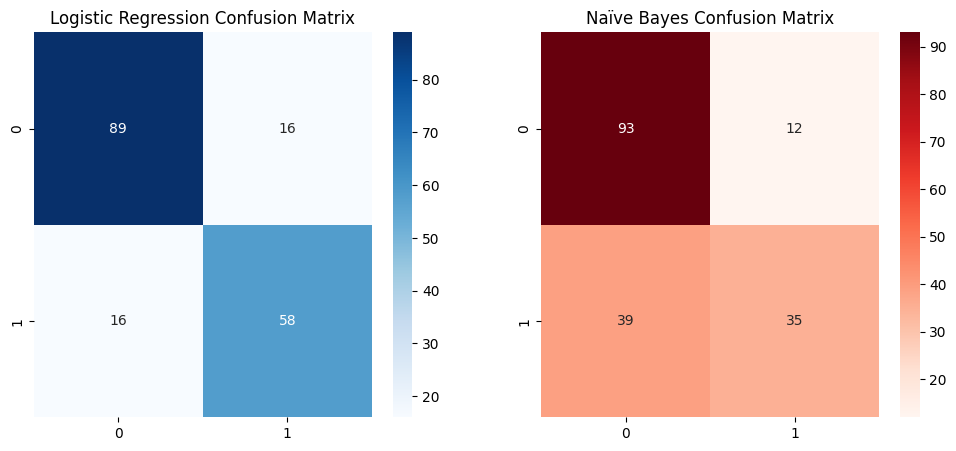

In [44]:
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")

sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Reds", ax=axes[1])
axes[1].set_title("Naïve Bayes Confusion Matrix")

plt.show()